<a href="https://colab.research.google.com/github/sanjit1995/GlassClassification_Kaggle/blob/master/GlassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [135]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

Read .csv file and separate data and labels 

In [150]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/GlassClassification/glass.csv")
X = data.drop(['Type'], axis=1)
Y = data[['Type']]

In [ ]:
data.isnull().sum()

In [137]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [151]:
X.shape, Y.shape

((214, 9), (214, 1))

In [5]:
X.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0


Scale training Data

In [152]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(X)
x = pd.DataFrame(x)
x.columns = X.columns

Data Exploration

<Figure size 720x720 with 0 Axes>

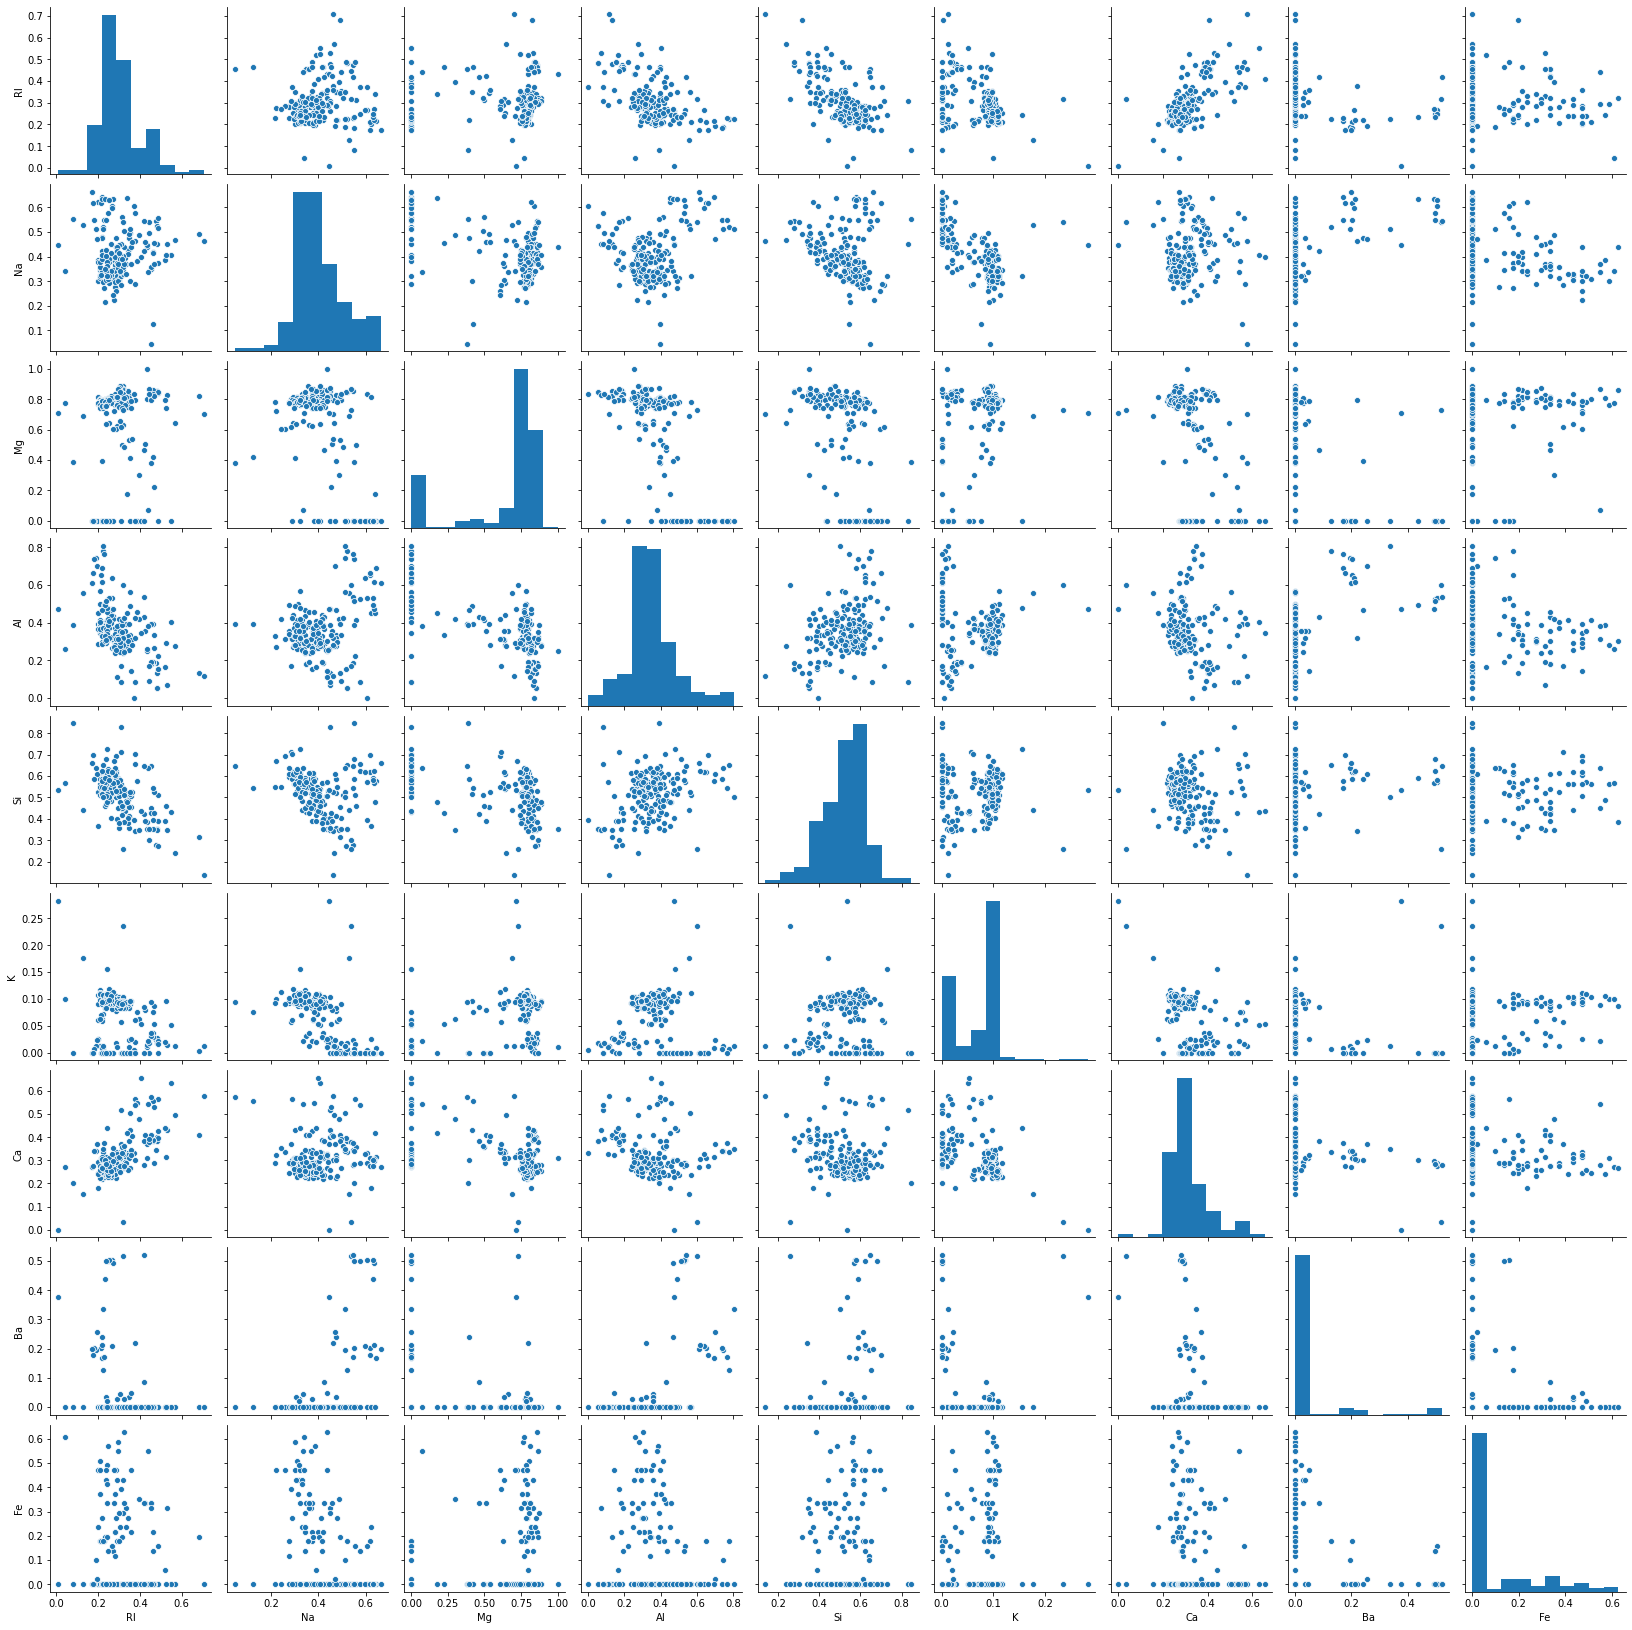

In [159]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.pairplot(x[x.columns.tolist()])
plt.show()

Outlier Detection and Removal

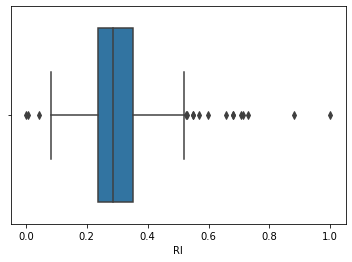

In [120]:
import seaborn as sns
sns.boxplot(x=x['RI'])

In [153]:
from scipy import stats
#for column in x.columns:
  #print(column + " - " + str(max(stats.zscore(x[column]))))
z = np.abs(stats.zscore(x))
outlier_ind, outlier_label = np.where(z > 3)

In [154]:
np.unique(outlier_label, return_counts=True)

(array([0, 1, 3, 4, 5, 6, 7, 8]), array([3, 2, 3, 6, 3, 7, 6, 3]))

Gather the indexes with z-score more than 3 and remove the indexes

In [155]:
del_ind = list(set(outlier_ind))
del_ind.sort()

In [ ]:
del_ind

In [157]:
x = x.drop(del_ind)
Y = Y.drop(del_ind)

In [158]:
x.shape, Y.shape

((194, 9), (194, 1))

In [160]:
Y['Type'].value_counts()

1    70
2    68
7    23
3    16
5     9
6     8
Name: Type, dtype: int64

Since from above, data is imbalanced. Do oversampling

In [ ]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(sampling_strategy='not majority', random_state=42)
X_res,Y_res=smk.fit_sample(x,Y)

In [195]:
X_res.shape, Y_res.shape

((410, 9), (410,))

In [171]:
np.unique(Y_res, return_counts=True)

(array([1, 2, 3, 5, 6, 7]), array([66, 67, 67, 70, 70, 70]))

In [184]:
Y_res.shape

(410, 6)

In [ ]:
y[:7]

In [ ]:
x['Fe'].value_counts()

In [13]:
x.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0


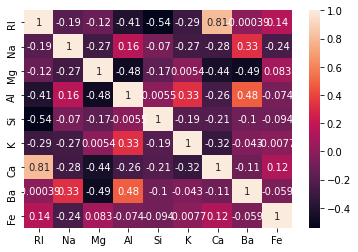

In [119]:
sns.heatmap(x.corr(), annot=True)

Apply PCA since some values are highly correlated

In [196]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X_res)

In [199]:
x_pca.shape, Y_res.shape

((410, 9), (410,))

In [200]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, Y_res, test_size=0.3, random_state=42)

In [201]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((287, 9), (123, 9), (287,), (123,))

In [ ]:
y_train

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

In [202]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [205]:
y_pred = model.predict(x_test)

In [59]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.0794871794871795

In [ ]:
pred = enc.inverse_transform(y_pred)
test = enc.inverse_transform(y_test)

In [ ]:
pred

In [ ]:
test

In [40]:
enc.categories_

[array([1, 2, 3, 5, 6, 7])]

XGBoostClassifier Accuracy and Confusion Matrix

In [207]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8943089430894309

In [206]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[17,  7,  1,  0,  0,  0],
       [ 3, 19,  0,  1,  0,  1],
       [ 0,  0, 18,  0,  0,  0],
       [ 0,  0,  0, 13,  0,  0],
       [ 0,  0,  0,  0, 17,  0],
       [ 0,  0,  0,  0,  0, 26]])

RandomForestClassifier Accuracy

In [169]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8536585365853658